# Touches Feature Exploration

In [12]:
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt

## General Plotting Functions

In [13]:
def scatter_plot(df, feature1, feature2):
    correlation = df[feature1].corr(df[feature2])
    
    plt.figure()
    plt.scatter(df[feature1], df[feature2], alpha = 0.1)
    plt.title(f'Scatter Plot of {feature1} vs {feature2}')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    
    plt.text(0.1, 0.9, f'Correlation: {correlation:.2f}', 
         transform=plt.gca().transAxes, fontsize=12, 
         bbox=dict(facecolor='white', alpha=0.5, edgecolor='black'))

    plt.show()

In [14]:
def grouped_boxplot (df, feature, group_feature):
    plt.figure()
    df.boxplot(column = feature, by = group_feature, grid = False, showmeans = True)
    plt.title(f'Box Plot of {feature} vs {group_feature}')
    plt.suptitle('')
    plt.xlabel(group_feature)
    plt.ylabel(feature)
    plt.show()

In [15]:
#freq_plot allows us to construct a histogram/bar plot, depending on the frequency of the variable we wish to visualise. If we wish to plot the 
#frequency of a feature in a dataframe, then we need to specify the dataframe that the feature comes from (df argument). If not (i.e. if we want
# to visualise the frequency of a series of values, then ignore the df argument, as this is initialised to a default value of 'None'). In the case
#that we are constructing a histogram/bar plot of a series of values, then we need to specify the plot_title argument (usually this will just be 
# the name of series of values e.g. Carries per 90)

def freq_plot(feature, bin_number, plot_title = None, df = None, font_size = 7, text_rotate = 0):
    if df is not None:
        plt.figure()
        plt.hist(df[feature], bins = bin_number, align = 'mid')
        plt.title(f'Histogram of {feature} Values')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.xticks(rotation = text_rotate, fontsize = font_size)
        plt.show()
    if plot_title is not None: 
        plt.figure()
        plt.hist(feature, bins = bin_number)
        plt.title(f'Histogram of {plot_title}')
        plt.xlabel(plot_title)
        plt.ylabel('Frequency')
        plt.xticks(rotation = text_rotate, fontsize = font_size)
        plt.show()

In [16]:
def discrete_freq_plot(feature, df, font_size = 7, text_rotate = 0, xticks = False, diff = 1):
    #get the value counts
    counts = df[feature].value_counts().sort_index()
    
    fig, ax = plt.subplots()
    counts.plot(kind = 'bar', alpha = 0.7)
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Frequency of {feature}')
    
    if xticks == True:
        range_min = df[feature].min()
        range_max = df[feature].max()
        ax.set_xticks(range(range_min, range_max + diff, diff))
        ax.set_xticklabels(range(range_min, range_max + diff, diff))
    
    plt.xticks(rotation = text_rotate, fontsize = font_size)
    plt.show()

In [17]:
def category_boxplot (df, feature, group_feature, text_diff = 2, dropna = False):
    #create figure
    plt.figure()
    
    #prep data by grouping into two categories
    if dropna == False:
        data = [df[df[group_feature] == 0][feature],   # Goals == 0
            df[df[group_feature] != 0][feature]]   # Goals != 0
    else: 
        data = [df[df[group_feature] == 0][feature].dropna(),   # Goals == 0
            df[df[group_feature] != 0][feature].dropna()]   # Goals != 0
    
    #create boxplot
    plt.boxplot(data, labels = [f'0 {group_feature}', f'Non-zero {group_feature}'], showmeans = True)
    plt.title(f'Box Plot of {feature} vs {group_feature} Category')
    plt.xlabel(f'{group_feature} Category')
    plt.ylabel(feature)
    
    #print mean/median 
    for i in range(len(data)):
        # Median (the horizontal line in the box)
        median = np.median(data[i])
        plt.text(i + 1.2, median, f'Median: {median:.2f}', ha='left', va='bottom', color='blue')

        # Mean (the green triangle in the boxplot)
        mean = np.mean(data[i])
        plt.text(i + 1.2, mean + text_diff, f'Mean: {mean:.2f}', ha='left', va='top', color='green')

    plt.show()

Exploratory Data Analysis of features related to carries and take-ons.

In [18]:
#load the att_explore dataframe in 
att_explore = pd.read_csv('att_explore.csv')
att_explore.head()

,Unnamed: 0,Player ID,Day,Matchweek,Venue,Result,Team,Opponent,Start,Position,...,RW,WB,Defenders,Midfielders,Wide Midfielders,Wingers,Penalty Success Rate,SOT Percentage,Team Goals,Pass Completion Percentage
0,10000,140,Sun,32,Away,L 1–2,Crystal Palace,Leicester City,Y,DM,...,0,0,0,1,0,0,NaN,0.0,1,83.783784
1,24977,340,Sat,29,Away,L 1–2,Bournemouth,Liverpool,N,LW,...,0,0,0,0,0,1,NaN,NaN,1,71.428571
2,37756,498,Sun,37,Away,D 0–0,Huddersfield,Manchester City,Y,CM,...,0,0,0,1,0,0,NaN,NaN,0,58.823529
3,18759,262,Sun,34,Away,D 2–2,Southampton,Brighton,N,LM,...,0,0,0,0,1,0,NaN,0.0,2,81.818182
4,168,3,Sun,38,Home,W 5–0,Manchester City,Norwich City,Y*,LM,...,0,0,0,0,1,0,NaN,0.2,5,87.500000


### Defensive Third Touches

Defensive Third Touches refers to the number of touches of the ball a player makes in the defensive third of the pitch. We first visualise the frequency of this feature. 

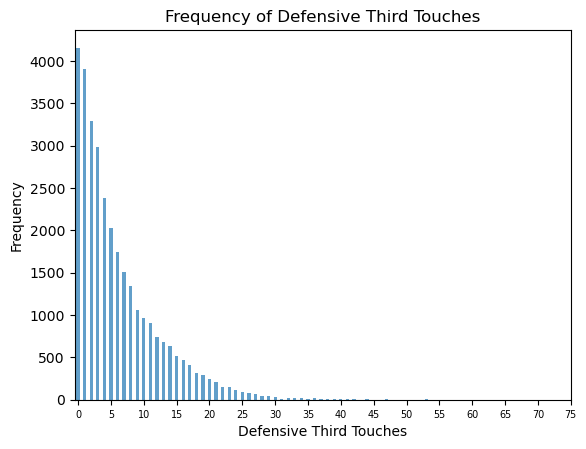

In [19]:
discrete_freq_plot('Defensive Third Touches', att_explore, xticks = True, diff = 5)

The frequency of defensive third touches is left-skewed, with majority of the observations having 0 defensive third touches. Let's now have a quick look at the relationship between defensive third touches and minutes played. 

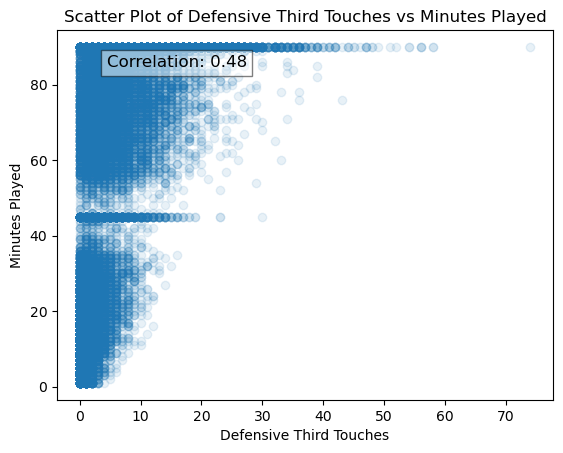

In [20]:
scatter_plot(att_explore, 'Defensive Third Touches', 'Minutes Played')

There is some correlation between minutes played and defensive third touches, but perhaps a correlation value of 0.48 indicates that the correlation between these two features is not particularly strong. 

#### Defensive Third Touches vs Goals

We don't really expect there to be any significant relationship between the number of defensive third touches recorded and goals. If anything, we expect observations with more defensive third touches to record less goals scored, because they are more consistently operating in the defensive areas of the pitch. 

<Figure size 640x480 with 0 Axes>

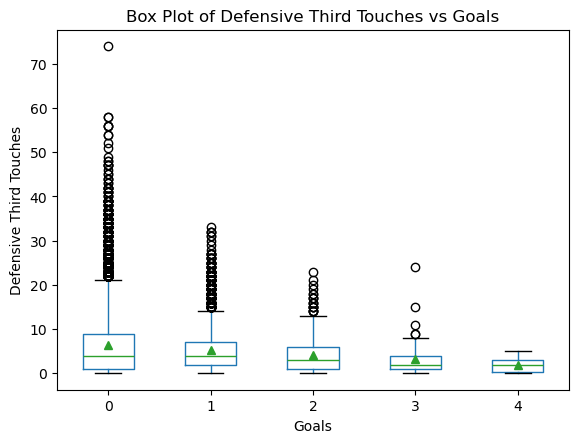

In [21]:
grouped_boxplot(att_explore, 'Defensive Third Touches', 'Goals')

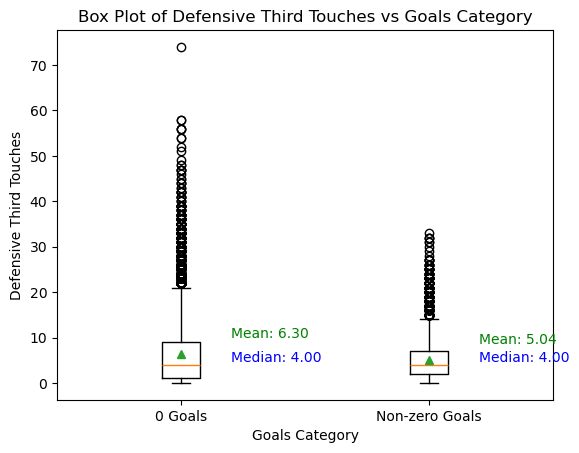

In [22]:
category_boxplot(att_explore, 'Defensive Third Touches', 'Goals', text_diff = 6)

As expected, there doesn't appear to be much relationship between the number of defensive third touches recorded and goals. In fact, it appears that the mean number of defensive third touches is actually higher for observations that recorded no goals, compared to observations that scored at least one goal. 

#### Defensive Third Touches vs Assists

<Figure size 640x480 with 0 Axes>

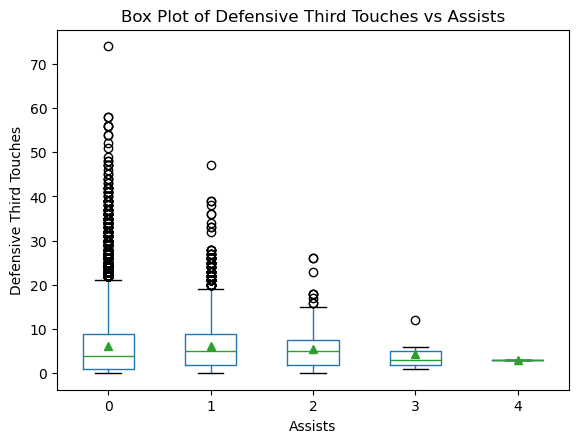

In [23]:
grouped_boxplot(att_explore, 'Defensive Third Touches', 'Assists')

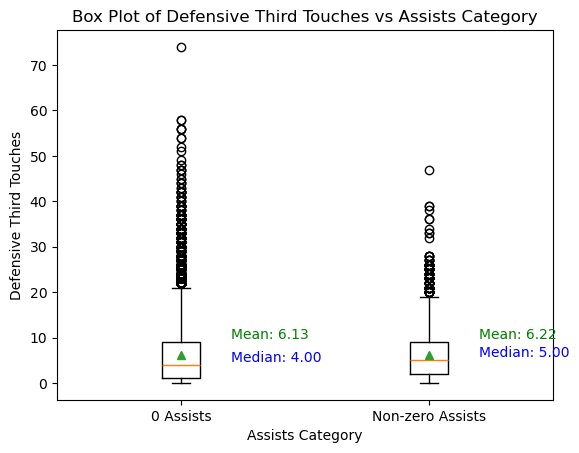

In [24]:
category_boxplot(att_explore, 'Defensive Third Touches', 'Assists', text_diff = 6)

Once again, it doesn't appear as if there is any relationship between defensive third touches and assists. This is not necessarily surprising. 

### Defensive Penalty Area Touches

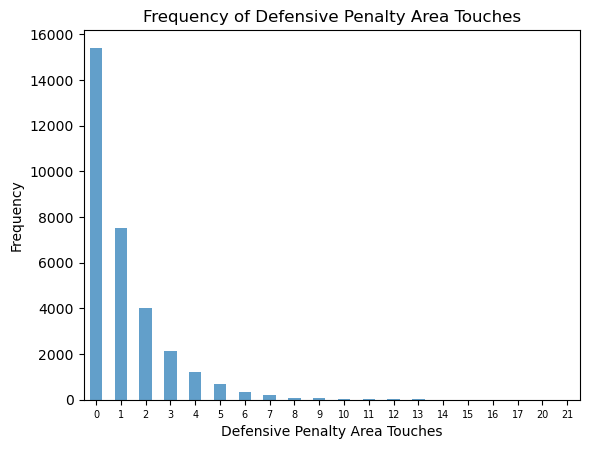

In [25]:
discrete_freq_plot('Defensive Penalty Area Touches', att_explore)

The frequency of defensive penalty area touches is left-skewed, with a large majority of observations recording no defensive penalty area touches. 

We expect there to be some correlation between defensive penalty area touches and defensive third touches, we can use a scatter plot to investigate this. 

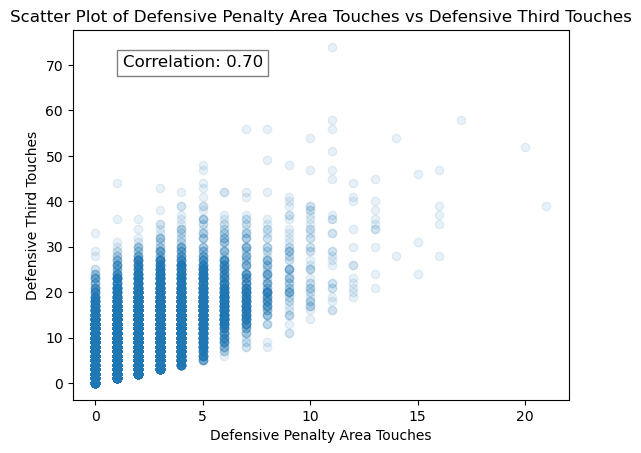

In [26]:
scatter_plot(att_explore, 'Defensive Penalty Area Touches', 'Defensive Third Touches')

Both the scatter plot and the calculated correlation value indicate that there is indeed some correlation between these two features. Based on this, we don't expect this feature to be particularly useful in predicting/explaining goals/assists. 

#### Defensive Penalty Area Touches vs Goals

<Figure size 640x480 with 0 Axes>

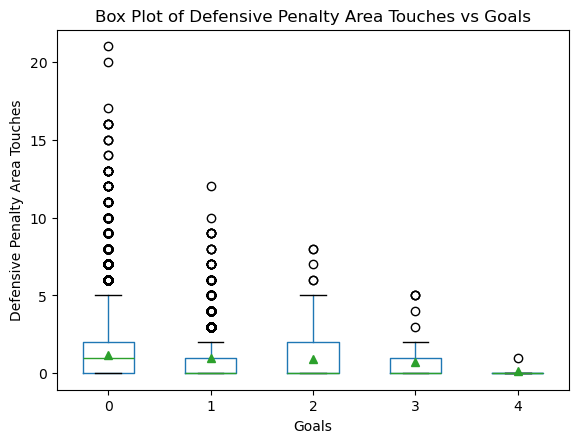

In [27]:
grouped_boxplot(att_explore, 'Defensive Penalty Area Touches', 'Goals')

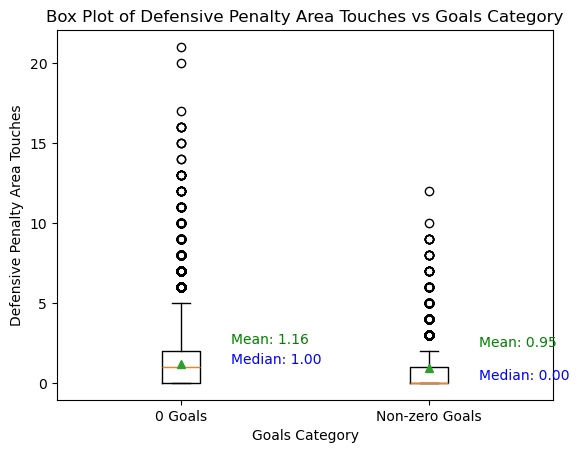

In [28]:
category_boxplot(att_explore, 'Defensive Penalty Area Touches', 'Goals')

As expected, there doesn't appear to be any significant relationship betweeen the number of defensive penalty area touches recorded and goals scored. In fact, the number of defensive penalty area touches recorded is actually lower for observations that recorded at least 1 goal. 

#### Defensive Penalty Area Touches vs Assists

<Figure size 640x480 with 0 Axes>

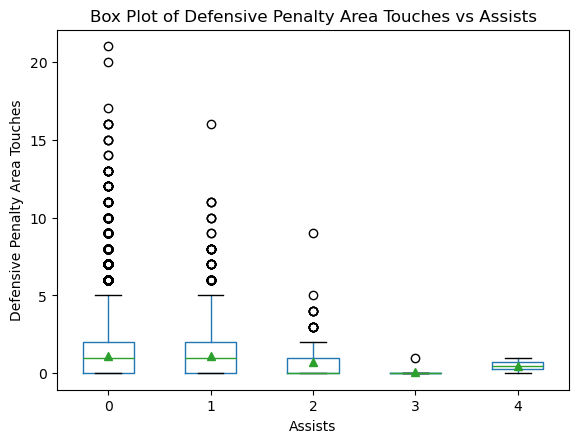

In [29]:
grouped_boxplot(att_explore, 'Defensive Penalty Area Touches', 'Assists')

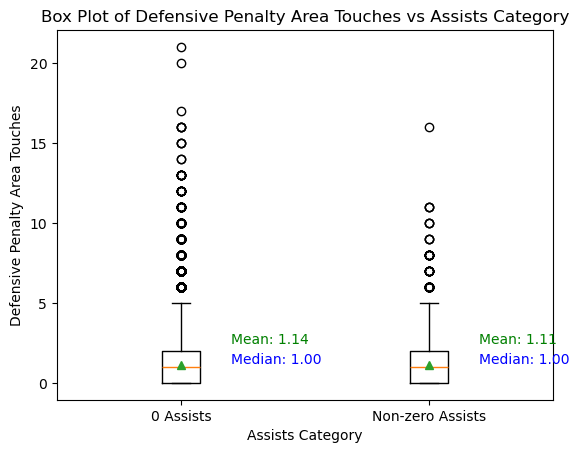

In [30]:
category_boxplot(att_explore, 'Defensive Penalty Area Touches', 'Assists')

When excluding outliers, the second plot shows that the distribution of defensive penalty area touches is virtually identical when comparing observations with no assists and observations with at least 1 assist. Overall, we can see that there is no particular relationship between this feature and assists. 

### Middle Third Touches

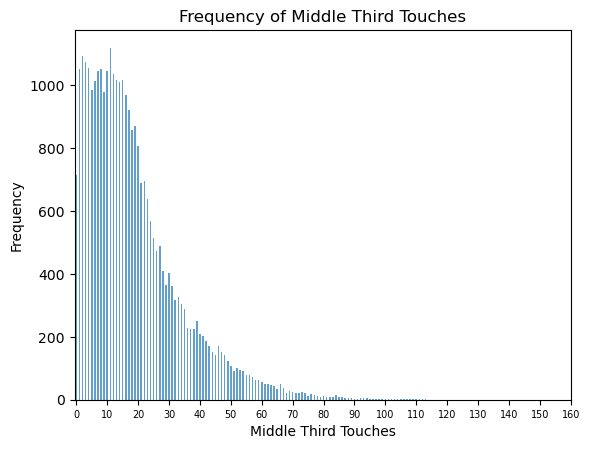

In [31]:
discrete_freq_plot('Middle Third Touches', att_explore, xticks = True, diff = 10)

As expected, the frequency of middle third touches is left-skewed, with majority of the observations having less than 20 middle third touches. 

Let's also quickly have a look at how middle third touches is distributed based on position. 

/var/folders/dv/bjx4hkg54x17symh1g3_3jf80000gq/T/ipykernel_23237/22281783.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  position_carries['Position'] = pd.Categorical(position_carries['Position'], categories=['Defenders', 'Midfielders', 'Wide Midfielders'


<Figure size 640x480 with 0 Axes>

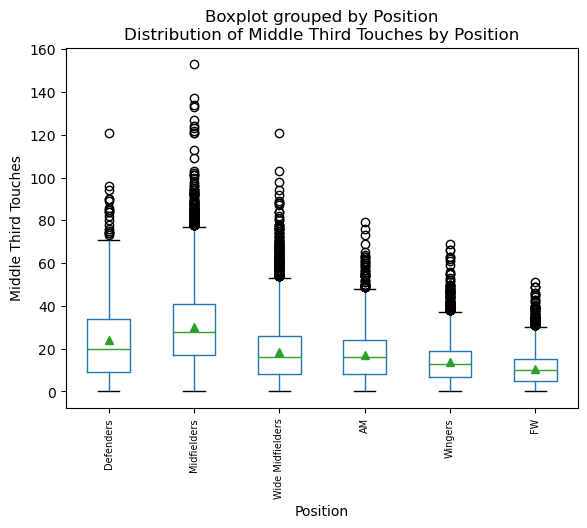

In [32]:
melted_df = att_explore.melt(id_vars=['Middle Third Touches'], 
                             value_vars=['Defenders', 'Midfielders', 'Wide Midfielders', 'AM', 'Wingers', 'FW'], 
                             var_name='Position', value_name='Played')

position_carries = melted_df[melted_df['Played'] == 1]

# Convert 'Position' to a categorical type with the specified order
position_carries['Position'] = pd.Categorical(position_carries['Position'], categories=['Defenders', 'Midfielders', 'Wide Midfielders'
                                                                                        , 'AM', 'Wingers', 'FW'], ordered=True)

plt.figure()
position_carries.boxplot(column = 'Middle Third Touches', by = 'Position', grid = False, showmeans = True)
plt.title('Distribution of Middle Third Touches by Position')
plt.xlabel('Position')
plt.ylabel('Middle Third Touches')
plt.xticks(fontsize=7, rotation = 90)
plt.show()

As expected, the mean/median number of middle third touches is highest for midfielders. Forwards have the lowest mean/median middle third touches, which is also as expected. This plot shows that players playing in a midfield position are most likely to accumulate higher numbers of middle third touches. Therefore, we don't expect there to be much relationship between middle third touches and goals/assists. 

#### Middle Third Touches vs Goals

<Figure size 640x480 with 0 Axes>

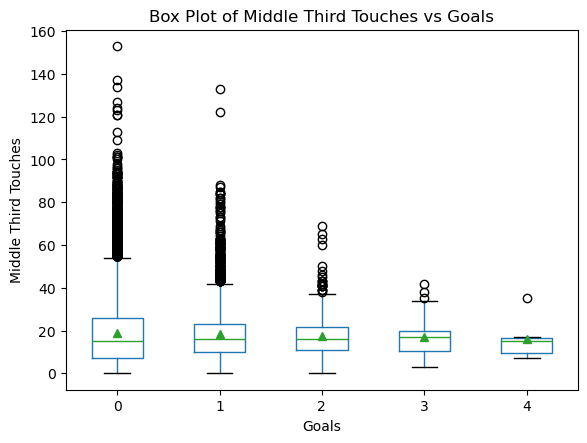

In [33]:
grouped_boxplot(att_explore, 'Middle Third Touches', 'Goals')

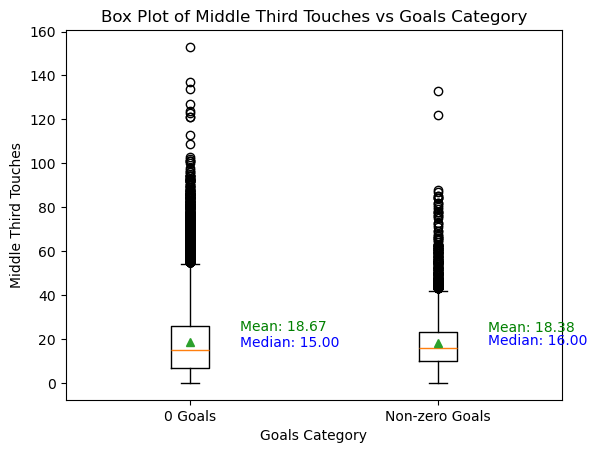

In [34]:
category_boxplot(att_explore, 'Middle Third Touches', 'Goals', text_diff = 10)

These two plots appear to show that there is no relationship between middle third touches and goals. This is as expected. 

#### Middle Third Touches vs Assists

<Figure size 640x480 with 0 Axes>

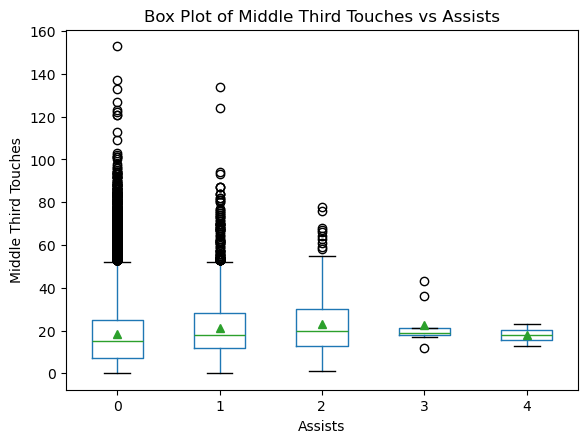

In [35]:
grouped_boxplot(att_explore, 'Middle Third Touches', 'Assists')

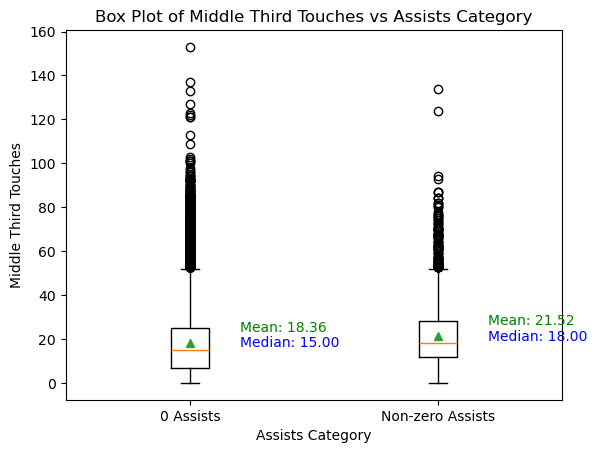

In [36]:
category_boxplot(att_explore, 'Middle Third Touches', 'Assists', text_diff = 10)

In comparison to the plots for the relationship between middle third touches and goals, it appears that there is more of a relationship between middle third touches and assists. However, this relatioship is not particularly significant. The mean/median number of middle third touches is only slightly higher for observations that recorded at least one assist. The first plot also reflects this, but the difference isn't large enough to be considered significant. 

### Attacking Third Touches

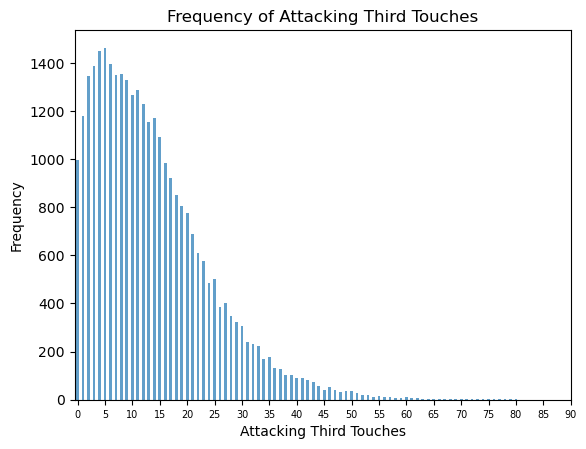

In [39]:
discrete_freq_plot('Attacking Third Touches', att_explore, xticks = True, diff = 5)

As expected, the frequency of attacking third touches is left skewed

/var/folders/dv/bjx4hkg54x17symh1g3_3jf80000gq/T/ipykernel_23237/979408426.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  position_carries['Position'] = pd.Categorical(position_carries['Position'], categories=['Defenders', 'Midfielders', 'Wide Midfielders'


<Figure size 640x480 with 0 Axes>

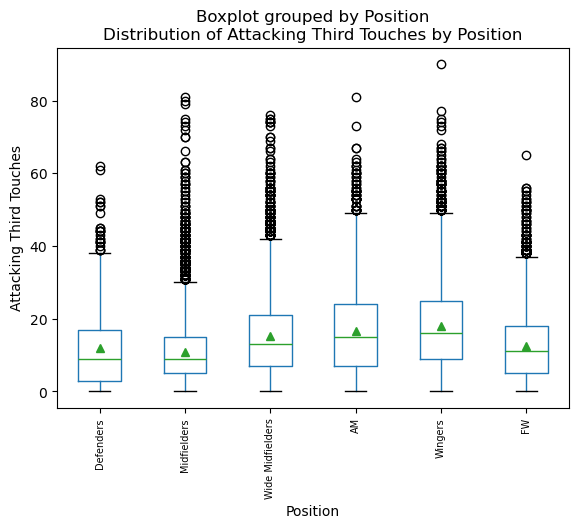

In [40]:
melted_df = att_explore.melt(id_vars=['Attacking Third Touches'], 
                             value_vars=['Defenders', 'Midfielders', 'Wide Midfielders', 'AM', 'Wingers', 'FW'], 
                             var_name='Position', value_name='Played')

position_carries = melted_df[melted_df['Played'] == 1]

# Convert 'Position' to a categorical type with the specified order
position_carries['Position'] = pd.Categorical(position_carries['Position'], categories=['Defenders', 'Midfielders', 'Wide Midfielders'
                                                                                        , 'AM', 'Wingers', 'FW'], ordered=True)

plt.figure()
position_carries.boxplot(column = 'Attacking Third Touches', by = 'Position', grid = False, showmeans = True)
plt.title('Distribution of Attacking Third Touches by Position')
plt.xlabel('Position')
plt.ylabel('Attacking Third Touches')
plt.xticks(fontsize=7, rotation = 90)
plt.show()

The plot above shows us the distribution of attacking third touches for different positions. It is interesting to see that the difference in the mean and median number of attacking third touches isn't necessarily as pronounced as we would expect. The median/mean number of attacking third touches is actually quite similar for midfielders when compared to forwards for example. As an extension of this, it was unexpected to see the number of attacking third touches being so low for fowards. I would've expected forwards followed by wingers to have the most attacking third touches. A potential explanation for this is the fact that players in forward positions in general have a lot fewer touches of the ball when compared with players in midfield positions. Therefore, it may be worth looking at the proportion of touches that are in the attacking third, rather than the gross number of attacking third touches. 

/var/folders/dv/bjx4hkg54x17symh1g3_3jf80000gq/T/ipykernel_23237/3405816939.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  position_carries['Position'] = pd.Categorical(position_carries['Position'], categories=['Defenders', 'Midfielders', 'Wide Midfielders'


<Figure size 640x480 with 0 Axes>

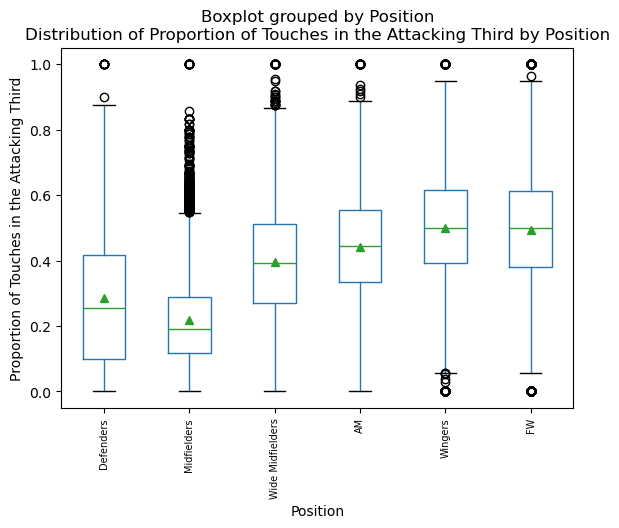

In [58]:
att_explore['Proportion of Touches in the Attacking Third'] = att_explore['Attacking Third Touches']/att_explore['Touches']

#replace all NA values with 0
att_explore['Proportion of Touches in the Attacking Third'] = att_explore['Proportion of Touches in the Attacking Third'].fillna(0)

melted_df = att_explore.melt(id_vars=['Proportion of Touches in the Attacking Third'], 
                             value_vars=['Defenders', 'Midfielders', 'Wide Midfielders', 'AM', 'Wingers', 'FW'], 
                             var_name='Position', value_name='Played')

position_carries = melted_df[melted_df['Played'] == 1]

# Convert 'Position' to a categorical type with the specified order
position_carries['Position'] = pd.Categorical(position_carries['Position'], categories=['Defenders', 'Midfielders', 'Wide Midfielders'
                                                                                        , 'AM', 'Wingers', 'FW'], ordered=True)

plt.figure()
position_carries.boxplot(column = 'Proportion of Touches in the Attacking Third', by = 'Position', grid = False, showmeans = True)
plt.title('Distribution of Proportion of Touches in the Attacking Third by Position')
plt.xlabel('Position')
plt.ylabel('Proportion of Touches in the Attacking Third')
plt.xticks(fontsize=7, rotation = 90)
plt.show()

We can now see that the proportion of touches that happen in the attacking third is much higher for forwards, wingers, attacking midfielders and wide midfielders when compared to defenders and midfielders. This makes a lot more sense. However, we should also note that touches in the attacking third are different to touches in the penalty area (i.e. a touch in the penalty area is recorded as such, and not included in the count for touches in the attacking third, even though the penalty area is technically a part of the attacking third of the pitch). 

#### Attacking Third Touches vs Goals

We first look at the relationship between attacking third touches and goals. 

<Figure size 640x480 with 0 Axes>

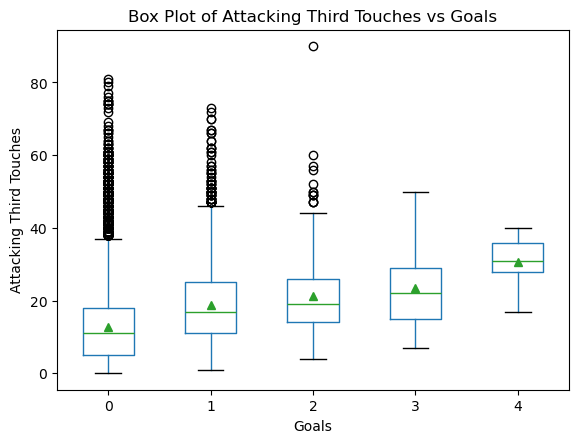

In [48]:
grouped_boxplot(att_explore, 'Attacking Third Touches', 'Goals')

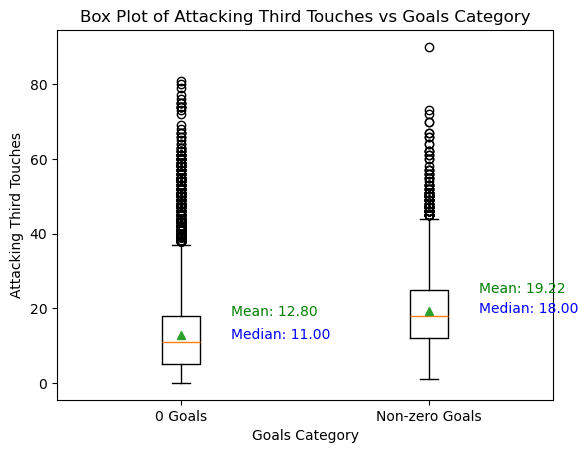

In [51]:
category_boxplot(att_explore, 'Attacking Third Touches', 'Goals', text_diff = 8)

These plots show us that there appears to be quite a clear relationship between attacking third touches and goals. The first plot indicates that the mean/median number of attacking third touches increases steadily as the number of goals scored increases. The second plot reflects a similar idea, by showing that the mean/median number of attacking third touches is higher for observations that scored at least one goal.

We now have a look at the relationship between the proportion of touches that occur in the attacking third and goals. 

<Figure size 640x480 with 0 Axes>

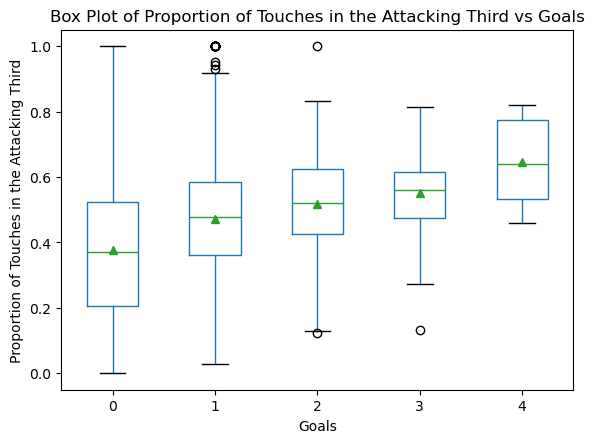

In [59]:
grouped_boxplot(att_explore, 'Proportion of Touches in the Attacking Third', 'Goals')

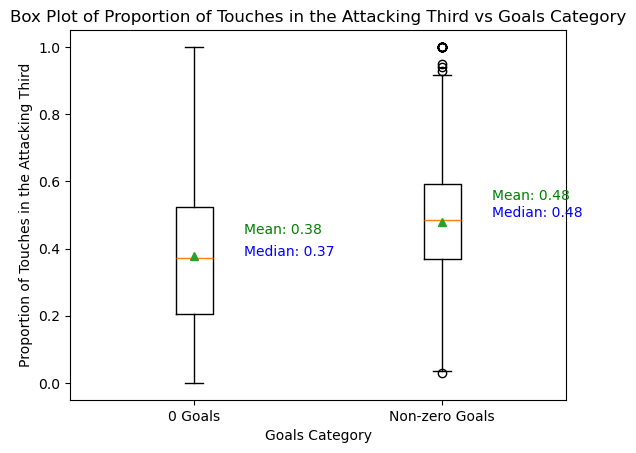

In [60]:
category_boxplot(att_explore, 'Proportion of Touches in the Attacking Third', 'Goals', text_diff = 0.1)

Perhaps surprisingly, the relationship between the proportion of touches in the attacking third and goals is less pronounced than the relationship between the gross number of attacking third touches. 

#### Attacking Third Touches vs Assists

<Figure size 640x480 with 0 Axes>

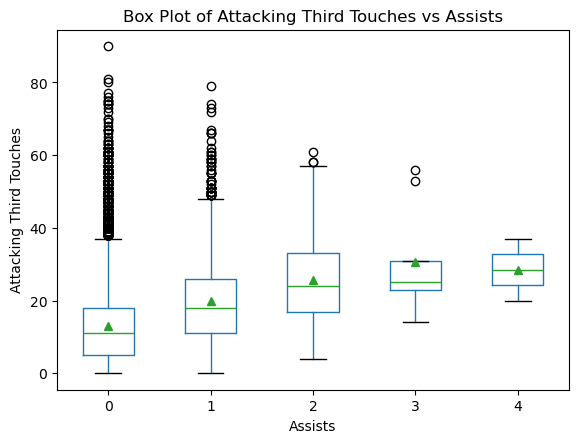

In [61]:
grouped_boxplot(att_explore, 'Attacking Third Touches', 'Assists')

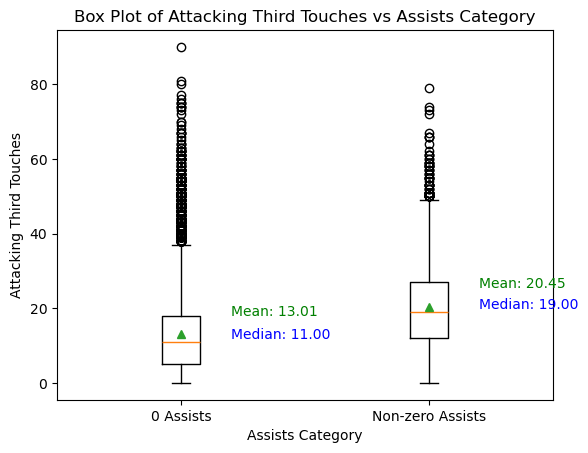

In [63]:
category_boxplot(att_explore, 'Attacking Third Touches', 'Assists', text_diff = 8)

Once again, we see quite a clear relationship between the number of attacking third touches and assists. 

### Penalty Area Touches

Out of all of the touches categories, we expect this to be the most promising at predicting/explaining goals and assists. This is because the players that accumulate a greater number of penalty area touches are also the players that are consistently in attacking positions, which is conducive to scoring more goals and providing more assists. 

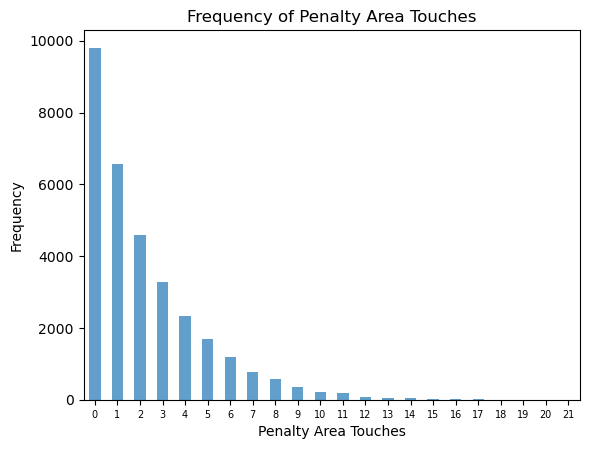

In [64]:
discrete_freq_plot('Penalty Area Touches', att_explore)

/var/folders/dv/bjx4hkg54x17symh1g3_3jf80000gq/T/ipykernel_23237/2494364683.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  position_carries['Position'] = pd.Categorical(position_carries['Position'], categories=['Defenders', 'Midfielders', 'Wide Midfielders'


<Figure size 640x480 with 0 Axes>

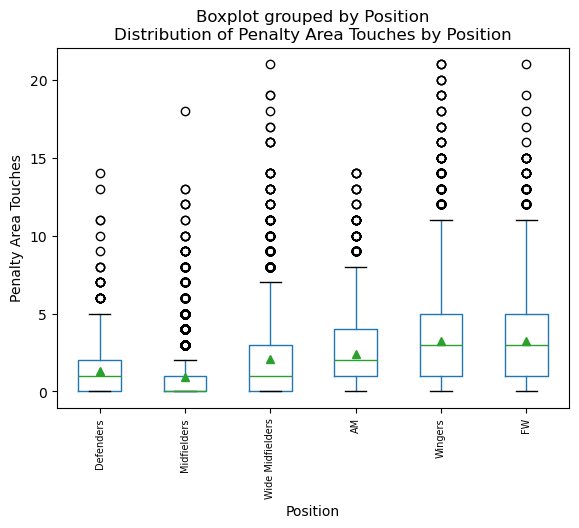

In [65]:
melted_df = att_explore.melt(id_vars=['Penalty Area Touches'], 
                             value_vars=['Defenders', 'Midfielders', 'Wide Midfielders', 'AM', 'Wingers', 'FW'], 
                             var_name='Position', value_name='Played')

position_carries = melted_df[melted_df['Played'] == 1]

# Convert 'Position' to a categorical type with the specified order
position_carries['Position'] = pd.Categorical(position_carries['Position'], categories=['Defenders', 'Midfielders', 'Wide Midfielders'
                                                                                        , 'AM', 'Wingers', 'FW'], ordered=True)

plt.figure()
position_carries.boxplot(column = 'Penalty Area Touches', by = 'Position', grid = False, showmeans = True)
plt.title('Distribution of Penalty Area Touches by Position')
plt.xlabel('Position')
plt.ylabel('Penalty Area Touches')
plt.xticks(fontsize=7, rotation = 90)
plt.show()

Again, it is surprising to see that there isn't much difference in the mean/median number of penalty area touches when comparing forwards to wingers. 

Let's also have a quick look at the relationship between penalty area touches and attacking third touches. 

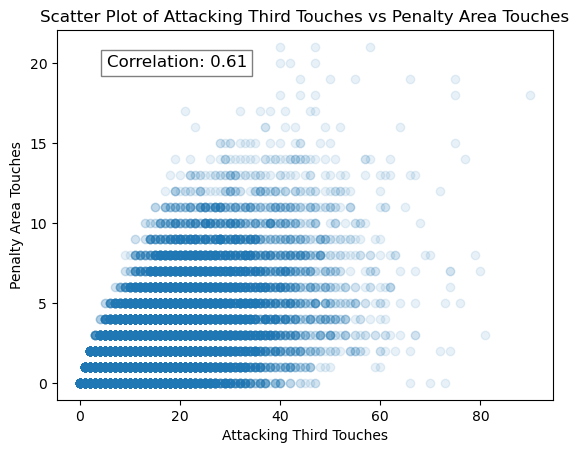

In [66]:
scatter_plot(att_explore, 'Attacking Third Touches', 'Penalty Area Touches')

So there is definitely some correlation between these two features, but it cannot be said that their relationship is particularly strong. 

#### Penalty Area Touches vs Goals

<Figure size 640x480 with 0 Axes>

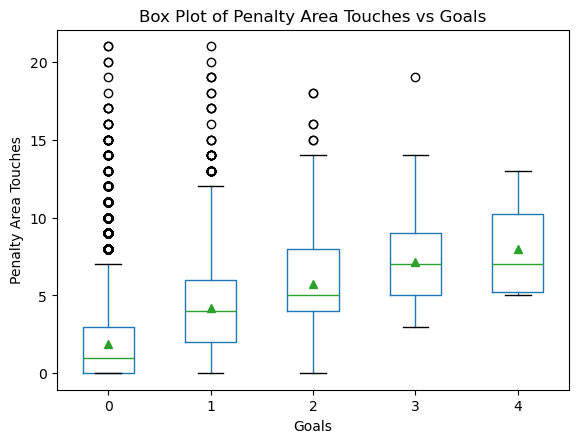

In [67]:
grouped_boxplot(att_explore, 'Penalty Area Touches', 'Goals')

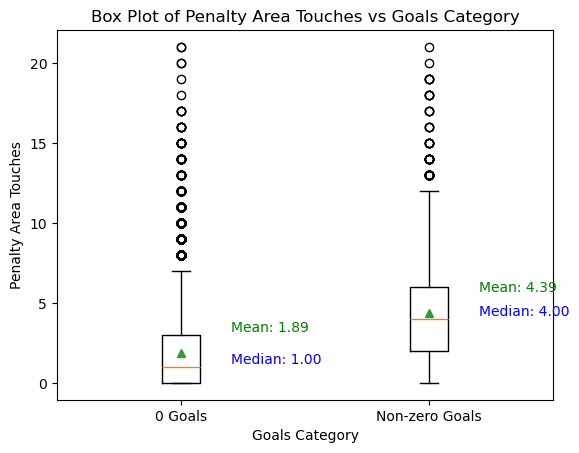

In [68]:
category_boxplot(att_explore, 'Penalty Area Touches', 'Goals')

It is not surprising to see that there appears to be a clear relationship between the number of penalty area touches accumulated and the number of goals scored. 

#### Penalty Area Touches vs Assists

<Figure size 640x480 with 0 Axes>

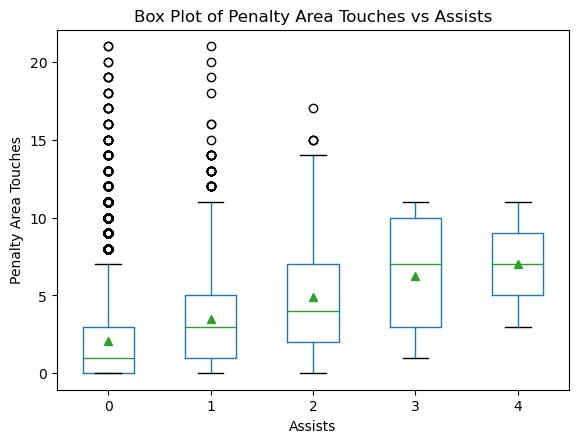

In [70]:
grouped_boxplot(att_explore, 'Penalty Area Touches', 'Assists')

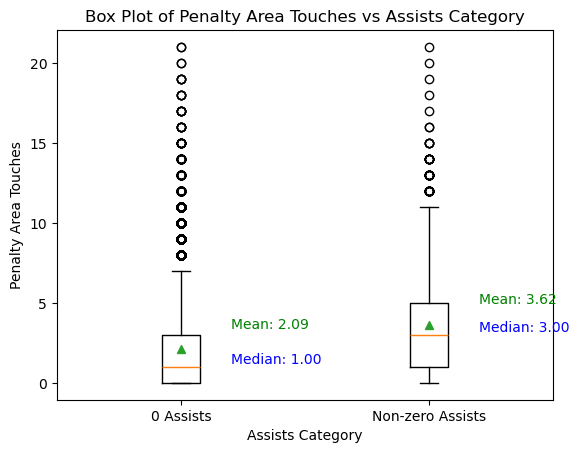

In [71]:
category_boxplot(att_explore, 'Penalty Area Touches', 'Assists')

Likewise, we also see a positive relationship between penalty area touches and assists. It should be noted however that this relationship isn't as strong as the pattern we see between penalty area touches and goals.

